In [1]:
import numpy as np
import cv2
import tensorflow as tf

In [2]:
import glob
import os, sys, math
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.data import parallel_interleave
from tensorflow.contrib.data import batch_and_drop_remainder

### Code up circle-padding

In [130]:
mask = np.zeros((128,128), dtype=np.float32)

In [98]:
h = w = 128

In [131]:
cv2.circle (mask, center=(h // 2, w // 2), 
            radius=int(64*np.sqrt(2)/2), color=255, 
            thickness=-1 )
#128-int(128*np.sqrt(2)/4)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [108]:
img = 255*np.ones((128,128,1), dtype=np.float32)

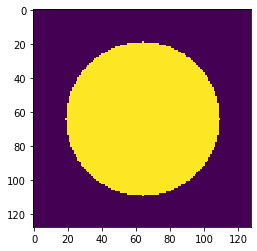

In [132]:
plt.imshow(mask)

In [72]:
mask = np.zeros((h, w), dtype=np.uint8)

In [74]:
cv2.circle(mask, center=(h // 2, w // 2), radius=150, color=255, thickness=202)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

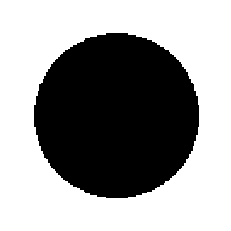

In [75]:
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

#### Apply to mnist

- Set up mnist image and resize

In [137]:
mnist = input_data.read_data_sets(os.path.abspath("./MNIST_data/"), one_hot=False)

Extracting /scratch/midway2/tkurihana/clouds/reproduction/pipeline/MNIST_data/train-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/reproduction/pipeline/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/reproduction/pipeline/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/reproduction/pipeline/MNIST_data/t10k-labels-idx1-ubyte.gz


In [141]:
test_images = mnist.test.images

In [142]:
h = w = 128
### reshape
test_images = test_images.reshape(-1,28,28,1)

### resize
resize_test_images = tf.image.resize_images(test_images[0], (h,w))

### back to numpy
rtest_imgs = tf.keras.backend.eval(resize_test_images)

In [143]:
rtest_imgs.shape

(128, 128, 1)

- Make mask matrix

In [201]:
#
# radius = r(original) * sqrt(2)/2 = 64 * sqrt(2)/2
# Fill circle as 1
mask = np.zeros((h,w), dtype=np.float32)
cv2.circle (mask, center=(h // 2, w // 2), 
            radius=int(62), color=1, 
            thickness=-1 )

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [210]:
128//2

64

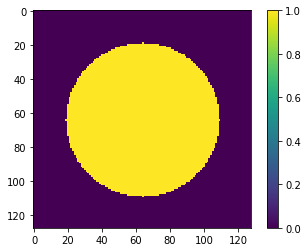

In [161]:
### check mask
plt.imshow(mask)
plt.colorbar()

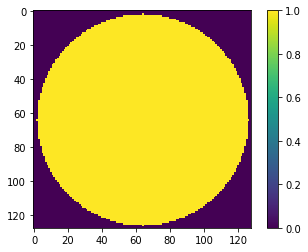

In [202]:
### check mask
plt.imshow(mask)
plt.colorbar()

- Matmul mnist and mask

In [203]:
cimg = np.expand_dims(mask, axis=-1)*(rtest_imgs+1)

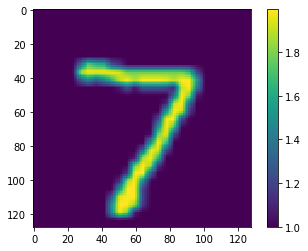

In [158]:
a = rtest_imgs+1
plt.imshow(a[:,:,0])
plt.colorbar()

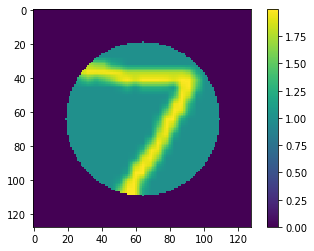

In [166]:
plt.imshow(cimg[:,:])
plt.colorbar()

In [204]:
cimg.shape

(128, 128, 1)

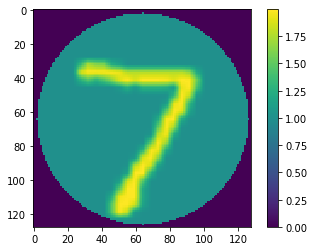

In [205]:
plt.imshow(cimg[:,:,0])
plt.colorbar()

- Check visualization by rotation

In [174]:
def rotate_fn(imgs, angles):
    """Assume single image
    """
    rimgs = tf.contrib.image.transform(
        imgs,
        tf.contrib.image.angles_to_projective_transforms(
            angles, 
            tf.cast(tf.shape(imgs)[1], dtype=tf.float32), 
            tf.cast(tf.shape(imgs)[2], dtype=tf.float32)
        )
    )
    return rimgs

In [206]:
angles = np.array([i*math.pi/180 for i in range(0,360,15)])

In [208]:
_cimg = cimg + 1

In [199]:
cimgs_list = [ np.copy(_cimg.reshape(1,128,128,1)) for i in range(len(angles))]
cimgs =  np.concatenate(cimgs_list, axis=0)
print(cimgs.shape)
rimgs_tf = rotate_fn(cimgs, angles)
rimgs_np = tf.keras.backend.eval(rimgs_tf)
rimgs_np.shape

(24, 128, 128, 1)


(24, 128, 128, 1)

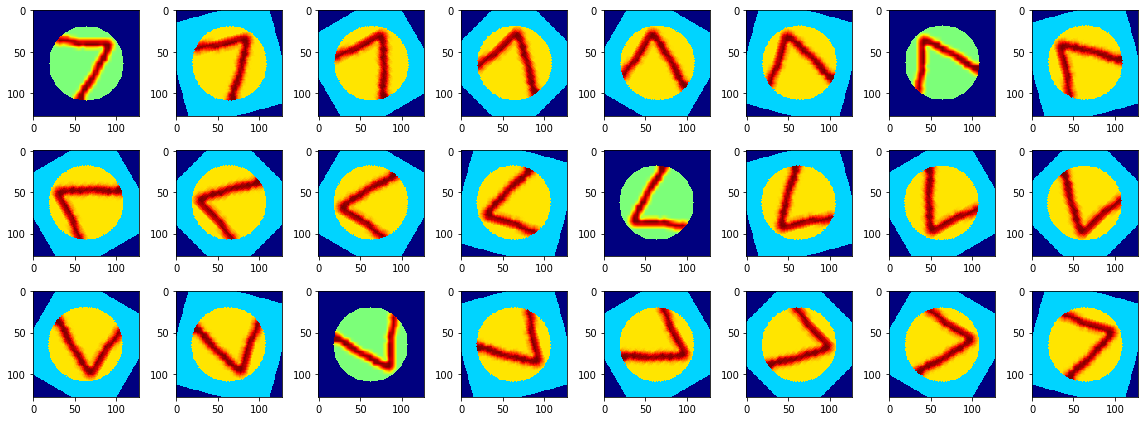

In [188]:
degrees = [i for i in range(0,360,15)]
fig, ax = plt.subplots(3, 8, figsize=(2*8,6) )
for idx, i in enumerate(range(8)):
    ax[0][idx].imshow(rimgs_np[i, :,:,0].reshape(128,128), cmap='jet')
    ax[1][idx].imshow(rimgs_np[i+8, :,:,0].reshape(128,128), cmap='jet')
    ax[2][idx].imshow(rimgs_np[i+16, :,:,0].reshape(128,128), cmap='jet')
fig.tight_layout()
plt.show()

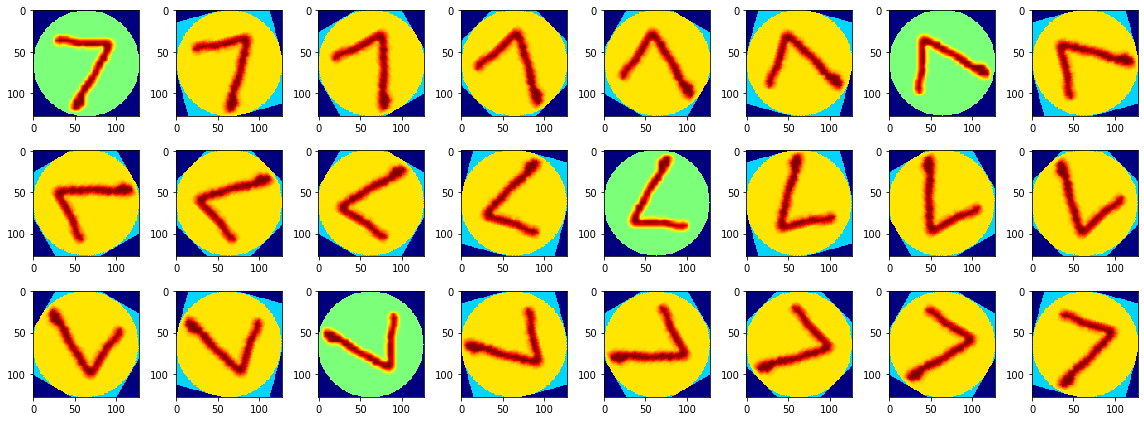

In [200]:
degrees = [i for i in range(0,360,15)]
fig, ax = plt.subplots(3, 8, figsize=(2*8,6) )
for idx, i in enumerate(range(8)):
    ax[0][idx].imshow(rimgs_np[i, :,:,0].reshape(128,128), cmap='jet')
    ax[1][idx].imshow(rimgs_np[i+8, :,:,0].reshape(128,128), cmap='jet')
    ax[2][idx].imshow(rimgs_np[i+16, :,:,0].reshape(128,128), cmap='jet')
fig.tight_layout()
plt.show()

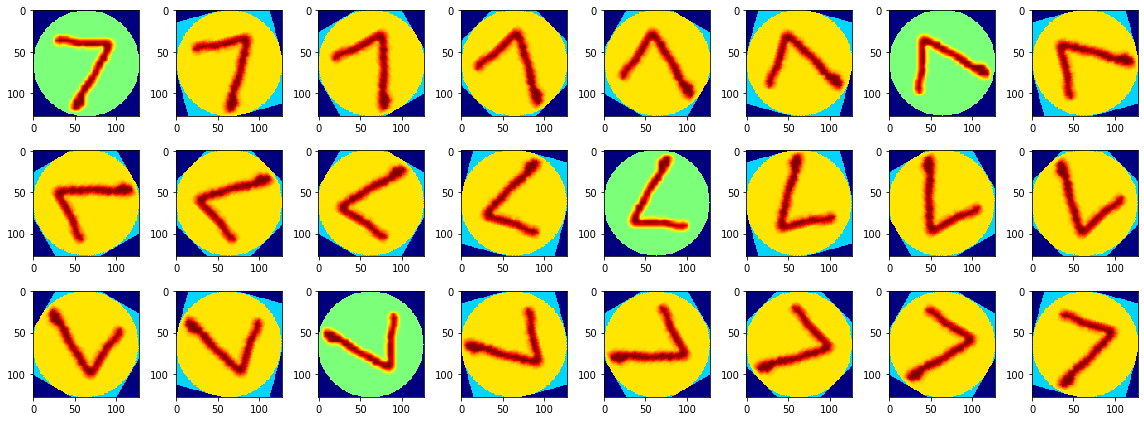

In [209]:
degrees = [i for i in range(0,360,15)]
fig, ax = plt.subplots(3, 8, figsize=(2*8,6) )
for idx, i in enumerate(range(8)):
    ax[0][idx].imshow(rimgs_np[i, :,:,0].reshape(128,128), cmap='jet')
    ax[1][idx].imshow(rimgs_np[i+8, :,:,0].reshape(128,128), cmap='jet')
    ax[2][idx].imshow(rimgs_np[i+16, :,:,0].reshape(128,128), cmap='jet')
fig.tight_layout()
plt.show()

In [217]:
a = np.ones((3,3,6))
b = 2*np.ones((3,3,1))
c = a*b
c.shape

(3, 3, 6)

### Check cloud patch with circle-padding

In [218]:
datadir='/project2/foster/clouds/data/clouds_laads_preprocessed_2000_2018_band28_29_31_circle_test'

In [220]:
filelist = glob.glob(os.path.join(datadir, '*.tfrecord'))

In [226]:
def data_extractor_fn(filelist, 
                      prefetch=1, read_threads=4, distribute=(1, 0)):
    def parser(ser):
        """
        Decode & Pass datast in tf.record
        *Cuation*
        floating point: tfrecord data ==> tf.float64
        """
        features = {
            "shape": tf.FixedLenFeature([3], tf.int64),
            "patch": tf.FixedLenFeature([], tf.string),
            "filename": tf.FixedLenFeature([], tf.string),
            "coordinate": tf.FixedLenFeature([2], tf.int64),
        }
        decoded = tf.parse_single_example(ser, features)
        patch = tf.reshape(
            tf.decode_raw(decoded["patch"], tf.float64), decoded["shape"]
        )
        # conversion of tensor
        patch = tf.cast(patch, tf.float32)
        return patch
    
    dataset = (
        tf.data.Dataset.list_files(filelist, shuffle=True)
            .shard(*distribute)
            .apply(
            parallel_interleave(
                lambda f: tf.data.TFRecordDataset(f).map(parser),
                cycle_length=read_threads,
                sloppy=True,
            )
        )
    )
    iterator = dataset.make_one_shot_iterator()

    next_element = iterator.get_next()
    patches_list = []
    with tf.Session() as sess:
        try:
            while True:
                patch = sess.run(next_element)
                patches_list.append(patch)
        except tf.errors.OutOfRangeError:
            print("OutOfRage --> finish process")
            pass
    return patches_list

In [227]:
patches_list = data_extractor_fn(filelist)

OutOfRage --> finish process


In [228]:
patches = np.concatenate([ np.expand_dims(i, axis=0).reshape(1,128,128, 6) for i in patches_list], axis=0)
patches.shape

(233, 128, 128, 6)

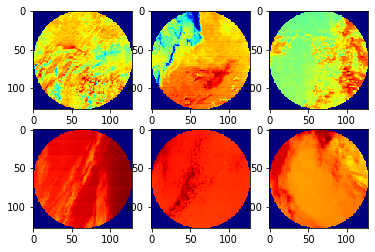

In [251]:
fig = plt.figure()
for idx, iband in enumerate(range(6)):
    ax = plt.subplot(2,3,idx+1)
    plt.imshow(patches[np.random.randint(0,len(patches),1),:,:,iband].reshape(128,128), cmap='jet')
plt.show()

### All test data's mean/std

In [4]:
def data_extractor_fn(filelist, gmean, gstdv, 
                      prefetch=1, read_threads=4, distribute=(1, 0)):
    def parser(ser):
        """
        Decode & Pass datast in tf.record
        *Cuation*
        floating point: tfrecord data ==> tf.float64
        """
        features = {
            "shape": tf.FixedLenFeature([3], tf.int64),
            "patch": tf.FixedLenFeature([], tf.string),
            "filename": tf.FixedLenFeature([], tf.string),
            "coordinate": tf.FixedLenFeature([2], tf.int64),
        }
        decoded = tf.parse_single_example(ser, features)
        patch = tf.reshape(
            tf.decode_raw(decoded["patch"], tf.float64), decoded["shape"]
        )
        # conversion of tensor
        patch = tf.cast(patch, tf.float32)
        return patch
    
    dataset = (
        tf.data.Dataset.list_files(filelist, shuffle=True)
            .shard(*distribute)
            .apply(
            parallel_interleave(
                lambda f: tf.data.TFRecordDataset(f).map(parser),
                cycle_length=read_threads,
                sloppy=True,
            )
        )
    )
    iterator = dataset.make_one_shot_iterator()

    next_element = iterator.get_next()
    patches_list = []
    with tf.Session() as sess:
        try:
            while True:
                patch = sess.run(next_element)
                patches_list.append(patch)
        except tf.errors.OutOfRangeError:
            print("OutOfRage --> finish process")
            pass
    return patches_list

In [18]:
datadir='/project2/foster/clouds/data/clouds_laads_preprocessed_2000_2018_band28_29_31_circle/reserves'
filelist = glob.glob(os.path.join(datadir, '*.tfrecord'))

In [19]:
patches_list = data_extractor_fn(filelist, np.zeros((2)), np.zeros((2)))

OutOfRage --> finish process


In [20]:
patches = np.concatenate(
    [np.expand_dims(i, axis=0).reshape(1,128,128, 6) for i in patches_list],
    axis=0)
patches.shape

(18097, 128, 128, 6)

In [21]:
global_mean = np.nanmean(patches, axis=(0,1,2), dtype=np.float64)
global_stdv = np.nanstd(patches, axis=(0,1,2), dtype=np.float64)

In [9]:
global_mean, global_stdv

(array([2.8285334 , 0.65359366, 0.05935913, 0.23858239, 0.9053434 ,
        0.9053434 ], dtype=float32),
 array([7.9705143 , 1.950118  , 0.18499519, 0.9517069 , 1.982629  ,
        2.1512568 ], dtype=float32))

In [22]:
global_mean, global_stdv

(array([7.99011065, 1.90119718, 0.22904559, 1.71305791, 3.77870671,
        4.40302895]),
 array([8.85611578, 2.14276682, 0.21053862, 1.07245705, 2.60360119,
        2.83189384]))

In [23]:
## Save 
# fname m2_02_band28_29_31_gmean.npy / m2_02_band28_29_31_gstdv.npy
save_basedir='/project2/foster/clouds/data/clouds_laads_preprocessed_2000_2018_band28_29_31_circle'
savedir=os.path.join(save_basedir, 'global_mean_std')

In [24]:
np.save(os.path.join(savedir,'m2_02_band28_29_31_gmean'), global_mean)
np.save(os.path.join(savedir,'m2_02_band28_29_31_gstdv'), global_stdv)

### Check Distribution

In [29]:
datadir='/project2/foster/clouds/data/clouds_laads_preprocessed_2000_2018_band28_29_31_circle'
filelist = glob.glob(os.path.join(datadir, '*.tfrecord'))

In [30]:
patches_list = []
patches_list = data_extractor_fn(filelist, np.zeros((2)), np.zeros((2)))

OutOfRage --> finish process


In [31]:
patches = np.concatenate(
    [np.expand_dims(i, axis=0).reshape(1,128*128, 6) for i in patches_list],
    axis=0)
patches.shape

(7301, 16384, 6)

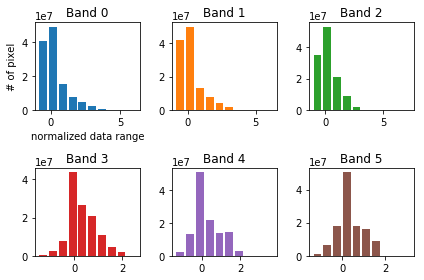

In [32]:
fig = plt.figure()
for idx, band in enumerate(range(6)):
    ax = plt.subplot(2,3, idx+1 )
    plt.hist(patches[:,:,band].ravel(), rwidth=0.8,color='C{}'.format(band))
    ax.set_title("Band {}".format(band))
    if band == 0:
        ax.set_ylabel('# of pixel')
        ax.set_xlabel("normalized data range")
fig.tight_layout()
plt.show()